In [139]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import scipy.constants as c
from scipy import stats

from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus

from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy import wcs
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

In [140]:
loaddir = r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85\Photometry\\'

I_phot_table = np.load(loaddir+'Abell85_I.npy', allow_pickle=True)
Q_phot_table = np.load(loaddir+'Abell85_Q.npy', allow_pickle=True)
U_phot_table = np.load(loaddir+'Abell85_U.npy', allow_pickle=True)
V_phot_table = np.load(loaddir+'Abell85_V.npy', allow_pickle=True)

I_phot_table_err = np.load(loaddir+'Abell85_I_err.npy', allow_pickle=True)
Q_phot_table_err = np.load(loaddir+'Abell85_Q_err.npy', allow_pickle=True)
U_phot_table_err = np.load(loaddir+'Abell85_U_err.npy', allow_pickle=True)
V_phot_table_err = np.load(loaddir+'Abell85_V_err.npy', allow_pickle=True)

sources = np.load(loaddir+'Abell85_sources.npy', allow_pickle=True)
#sources header: id xcentroid ycentroid sharpness roundness1 roundness2 npix sky peak flux mag ra_dec distance_center


Pol_Angles = 0.5*np.arctan(U_phot_table/Q_phot_table)
Linpol = np.sqrt(U_phot_table**2 + Q_phot_table**2)
print(np.shape(Q_phot_table))
print(cluster_center, pointing_center)



(12, 180)
(10.4075, -8.657499999999999) (10.45265828, -9.31775967)


In [141]:
bin_num = 21
Q_hist_arr, Q_bin_centers_arr = np.zeros((12,bin_num)), np.zeros((12,bin_num))
U_hist_arr, U_bin_centers_arr = np.zeros((12,bin_num)), np.zeros((12,bin_num))
V_hist_arr, V_bin_centers_arr = np.zeros((12,bin_num)), np.zeros((12,bin_num))
Pol_Angles_hist_arr, Pol_Angles_bin_centers_arr = np.zeros((12,bin_num)), np.zeros((12,bin_num))

for n in range(12):
    Q_hist, Q_bin_edges = np.histogram(Q_phot_table[n], bins=bin_num, range=(-2e-3,2e-3))
    Q_bin_centers = Q_bin_edges[:-1]+np.diff(Q_bin_edges[:2])[0]/2
    Q_hist_arr[n], Q_bin_centers_arr[n] = Q_hist, Q_bin_centers

    U_hist, U_bin_edges = np.histogram(U_phot_table[n], bins=bin_num, range=(-2e-3,2e-3))
    U_bin_centers = U_bin_edges[:-1]+np.diff(U_bin_edges[:2])[0]/2
    U_hist_arr[n], U_bin_centers_arr[n] = U_hist, U_bin_centers

    V_hist, V_bin_edges = np.histogram(V_phot_table[n], bins=bin_num, range=(-2e-3,2e-3))
    V_bin_centers = V_bin_edges[:-1]+np.diff(V_bin_edges[:2])[0]/2
    V_hist_arr[n], V_bin_centers_arr[n] = V_hist, V_bin_centers

    Pol_Angles_hist, Pol_Angles_bin_edges = np.histogram(Pol_Angles[n], bins=bin_num, range=(0,np.pi/4))
    Pol_Angles_bin_centers = Pol_Angles_bin_edges[:-1]+np.diff(Pol_Angles_bin_edges[:2])[0]/2
    Pol_Angles_hist_arr[n], Pol_Angles_bin_centers_arr[n] = Pol_Angles_hist, Pol_Angles_bin_centers

print(np.shape(Pol_Angles_hist_arr))

(12, 21)


In [142]:
channels = False
histogram = False

if channels:
    plt.figure(figsize=(10,6))
    plt.title('Search for leakage sources: Q vs I')
    plt.scatter(I_phot_table, Q_phot_table)
    plt.hlines(0, 0, np.max(I_phot_table), color='black', linestyle='dashed')
    plt.xlabel('Intensity I [mJy]')
    plt.ylabel('Intensity Q [mJy]')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.title('Search for leakage sources: U vs I')
    plt.scatter(I_phot_table, U_phot_table, s=5)
    plt.hlines(0, 0, np.max(I_phot_table), color='black', linestyle='dashed')
    plt.xlabel('Intensity I [mJy]')
    plt.ylabel('Intensity U [mJy]')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.title('Search for leakage sources: V vs I')
    plt.scatter(I_phot_table, V_phot_table, s=5)
    plt.hlines(0, 0, np.max(I_phot_table), color='black', linestyle='dashed')
    plt.xlabel('Intensity I [mJy]')
    plt.ylabel('Intensity V [mJy]')
    plt.show()

if histogram:
    plt.figure(figsize=(10,8))
    for n in range(12):
        plt.errorbar(Q_bin_centers_arr[n], Q_hist_arr[n], c=(n/12,0,0), marker='o', label='Freq band '+str(n+1))
    plt.ylabel('Probability')
    plt.xlabel('Intensity Q [mJy]')
    plt.xlim(-2e-3,2e-3)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,8))
    for n in range(12):
        plt.errorbar(U_bin_centers_arr[n], U_hist_arr[n], c=(n/12,0,0), marker='o', label='Freq band '+str(n+1))
    plt.ylabel('Probability')
    plt.xlabel('Intensity Q [mJy]')
    plt.xlim(-2e-3,2e-3)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,8))
    for n in range(12):
        plt.errorbar(V_bin_centers_arr[n], V_hist_arr[n], c=(n/12,0,0), marker='o', label='Freq band '+str(n+1))
    plt.ylabel('Probability')
    plt.xlabel('Intensity U [mJy]')
    plt.xlim(-2e-3,2e-3)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,8))
    plt.hist(Pol_Angles.flatten())
    plt.ylabel('Probability')
    plt.xlabel('Intensity V [mJy]')
    plt.legend()
    plt.show()

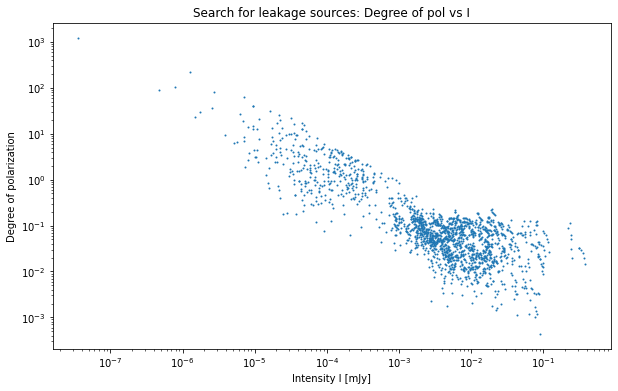

In [143]:
plt.figure(figsize=(10,6))
plt.title('Search for leakage sources: Degree of pol vs I')
plt.scatter(I_phot_table, Linpol/I_phot_table, s=1)
plt.xlabel('Intensity I [mJy]')
plt.ylabel('Degree of polarization')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [144]:
print(len(sources['distance_center']), len(Linpol))

180 12


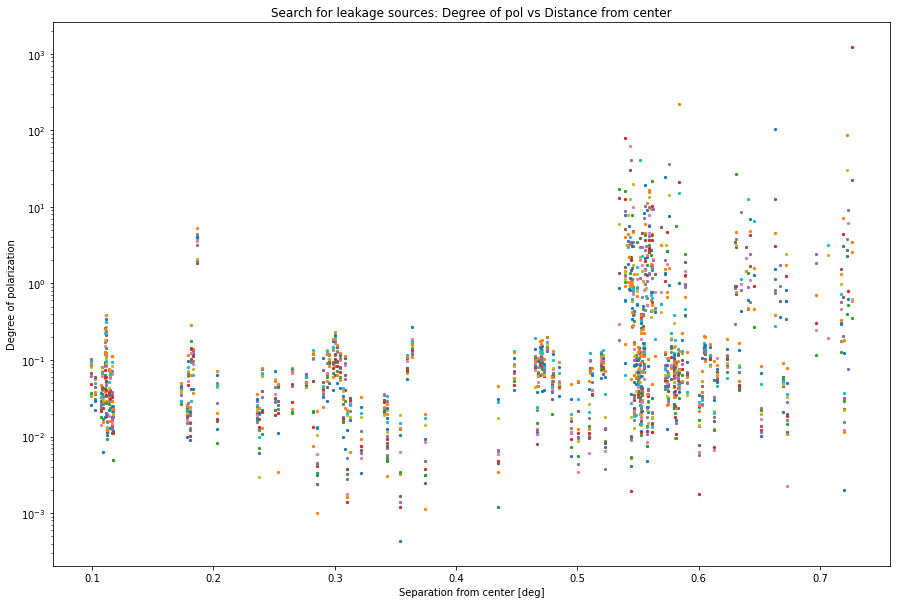

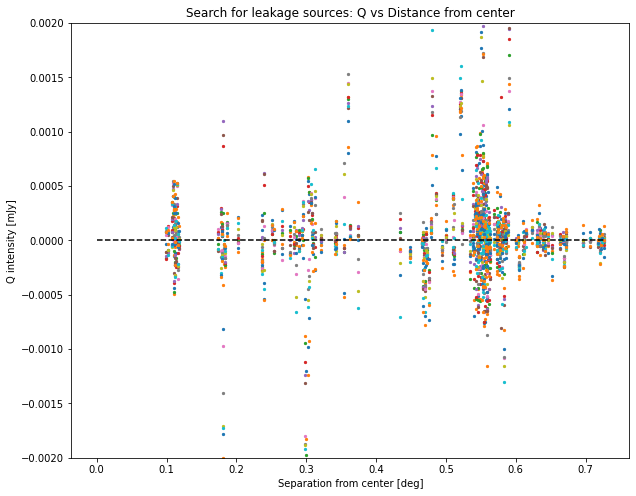

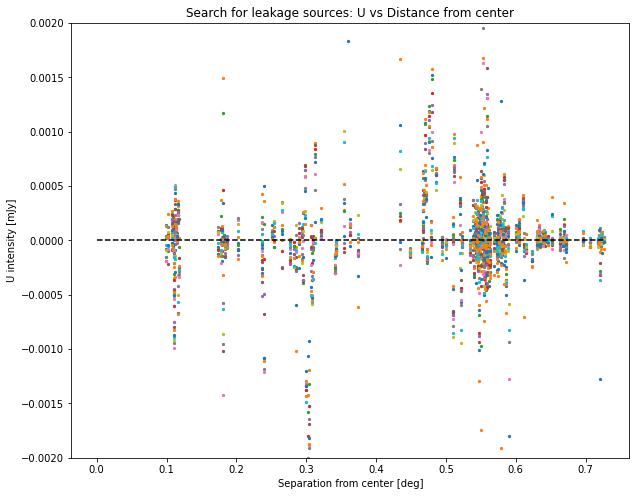

In [145]:
plt.figure(figsize=(15,10))
plt.title('Search for leakage sources: Degree of pol vs Distance from center')
for n in range(12):
    plt.scatter(sources['distance_center'], Linpol[n]/I_phot_table[n], s=5)
plt.xlabel('Separation from center [deg]')
plt.ylabel('Degree of polarization')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10,8))
plt.title('Search for leakage sources: Q vs Distance from center')
for n in range(12):
    plt.scatter(sources['distance_center'], Q_phot_table[n], s=5)
plt.hlines(0, 0, np.max(sources['distance_center']), color='black', linestyle='dashed')
plt.xlabel('Separation from center [deg]')
plt.ylabel('Q intensity [mJy]')
plt.ylim(-0.002,0.002)
plt.show()

plt.figure(figsize=(10,8))
plt.title('Search for leakage sources: U vs Distance from center')
for n in range(12):
    plt.scatter(sources['distance_center'], U_phot_table[n], s=5)
plt.hlines(0, 0, np.max(sources['distance_center']), color='black', linestyle='dashed')
plt.xlabel('Separation from center [deg]')
plt.ylabel('U intensity [mJy]')
plt.ylim(-0.002,0.002)
plt.show()